# How to save images and tables to files

Researchers need to include images and tables of data in manuscripts.

* One can copy images from a notebook, but researchers also need to control the dpi and image size. Here we instead emit these images to files with a specific dpi and size.
* Copying/pasting the table data from the notebook to your document is prone to error. Here we instead emit these tables as CSV files with can then be imported to Microsoft Word documents.

See also [Notebooks 101 - How not to lose data output files or collaborator edits](https://broadinstitute.zendesk.com/hc/en-us/articles/360027300571-Notebooks-101-How-not-to-lose-data-output-files-or-collaborator-edits).

## Setup

In [1]:
lapply(c('gapminder'),
       function(pkg) { if(! pkg %in% installed.packages()) { install.packages(pkg)} } )

[[1]]
NULL

In [2]:
library(gapminder)
library(lubridate)
library(tidyverse)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



# Image examples

## ggplot example

In [3]:
theme_set(theme_gray(base_size = 18))

$title
[1] "Full data = "

attr(,"class")
[1] "labels"

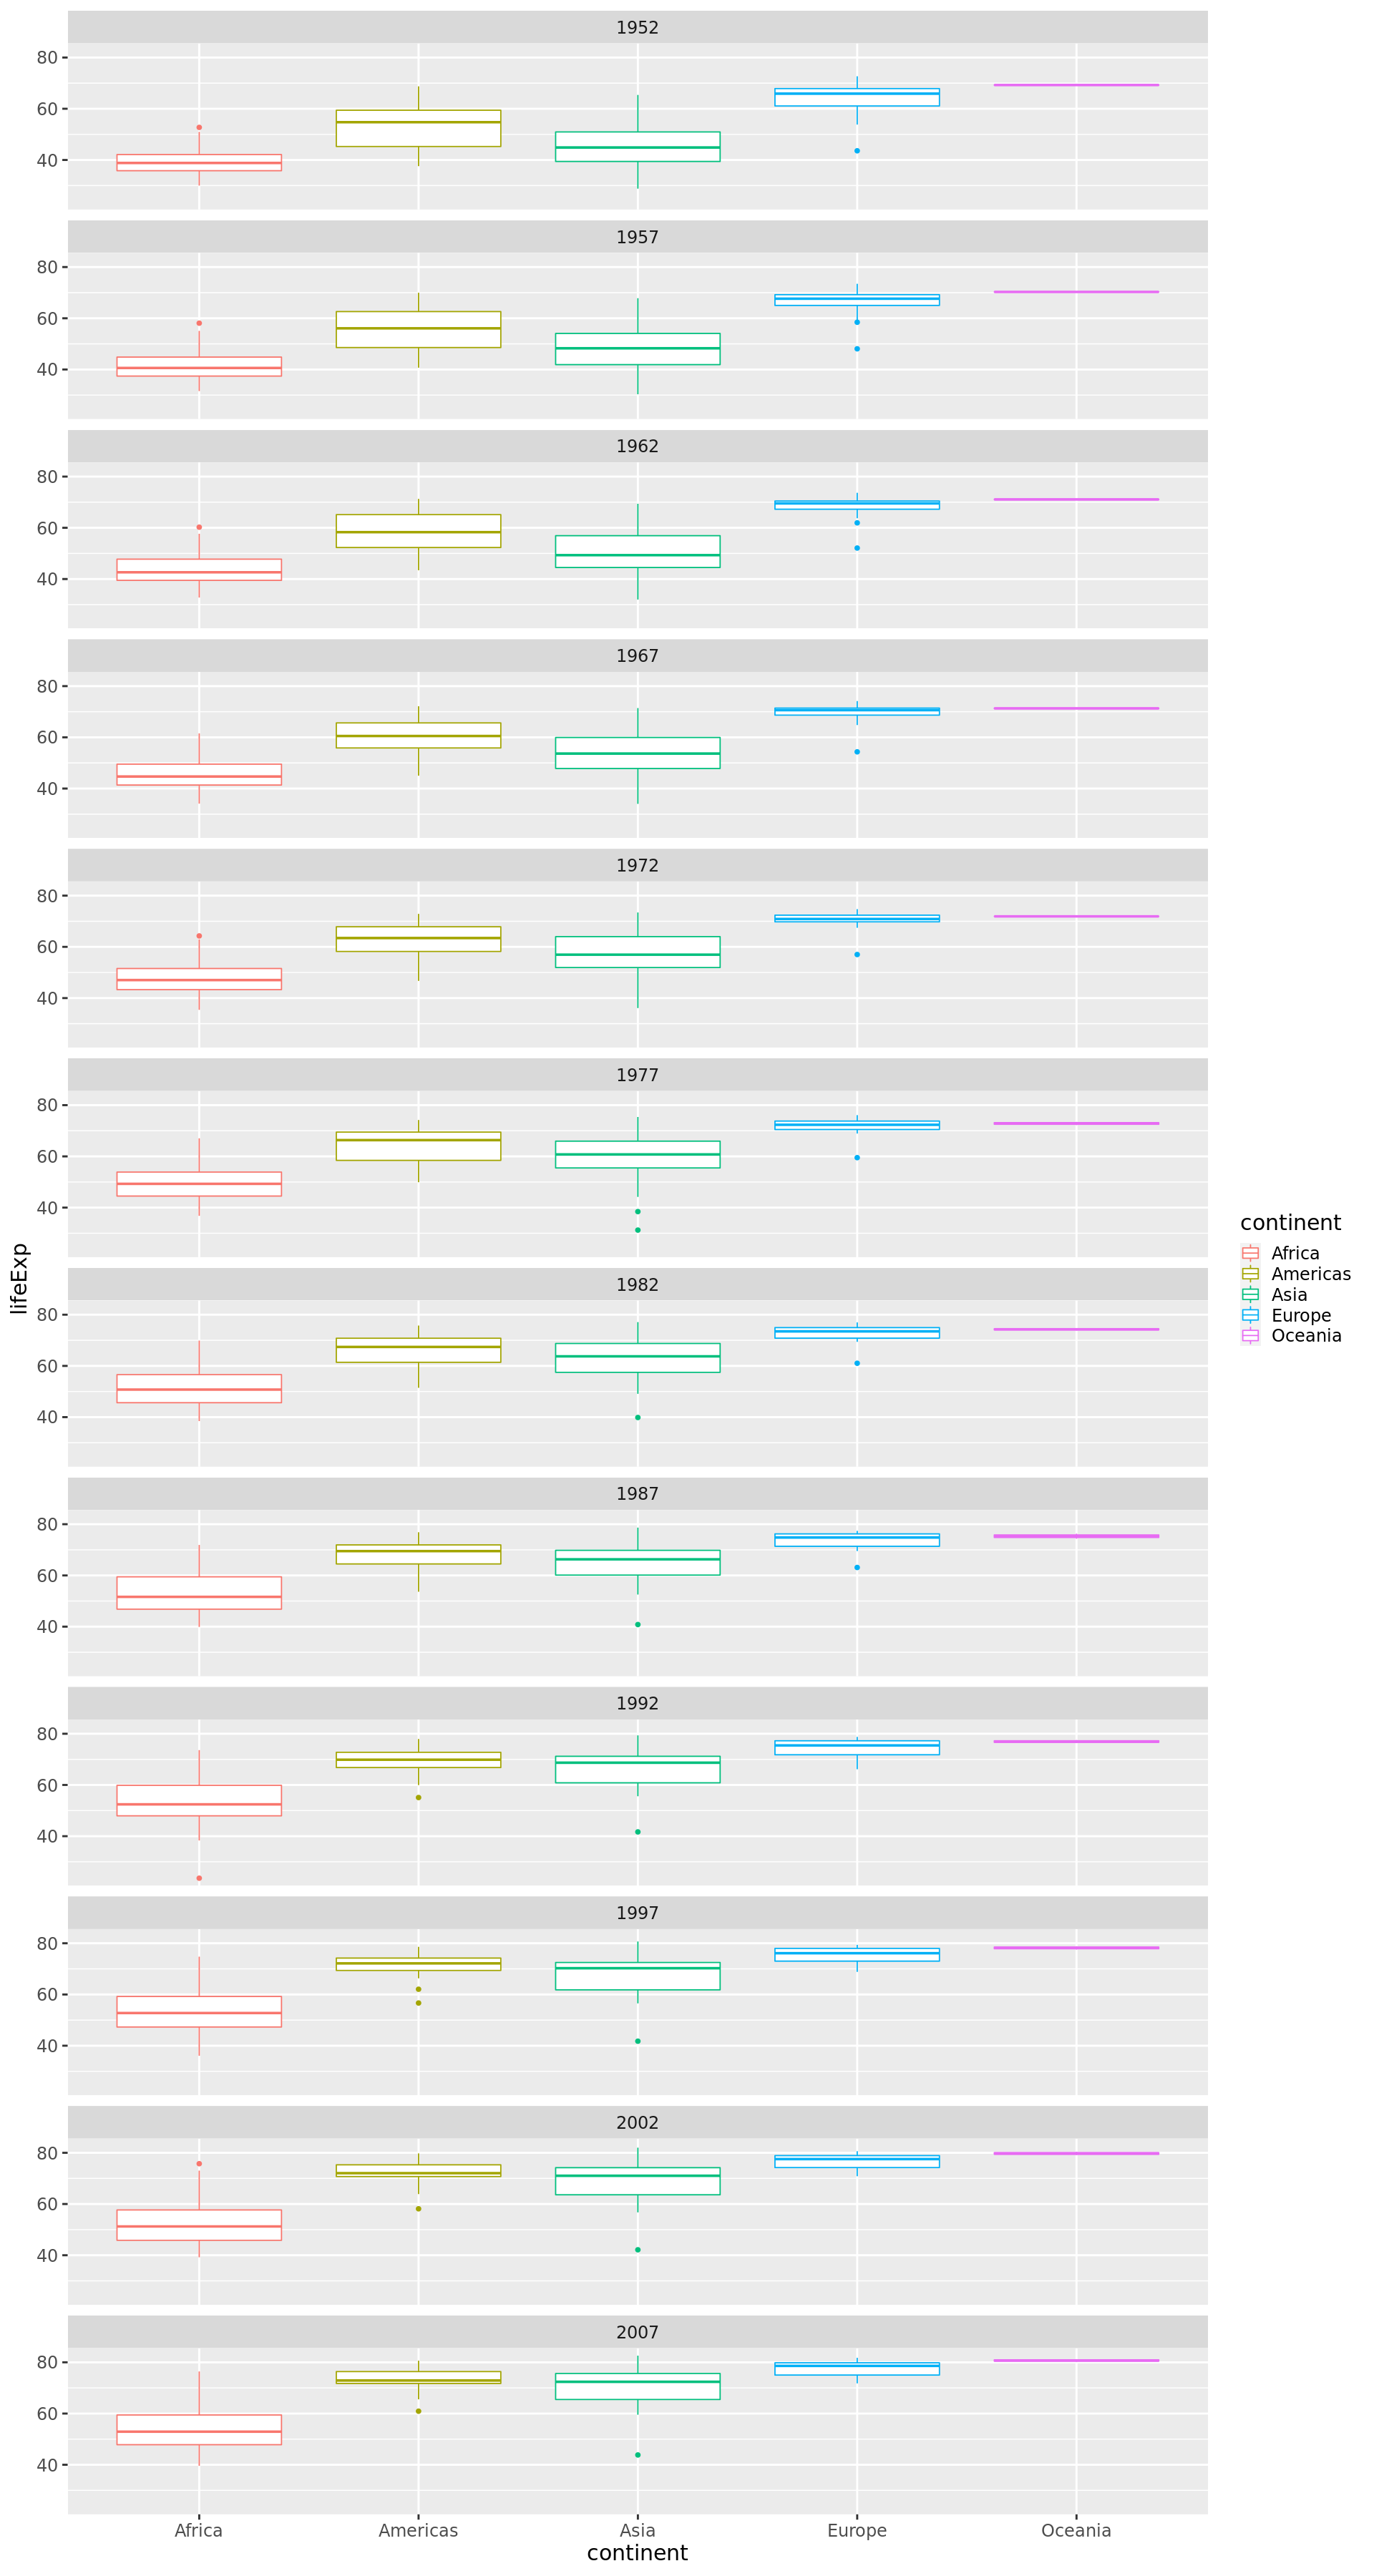

In [4]:
options(repr.plot.height = 30, repr.plot.width = 16)

gapminder %>% 
  ggplot(aes(continent, lifeExp, color = continent)) + 
  geom_boxplot() +
  facet_wrap(~ year, ncol = 1)
  ggtitle("Full data = ")

Save the boxplots to an external file.

In [5]:
ggsave('myboxplot-highres-6x4.png', dpi = 300, width = 16, height = 30)

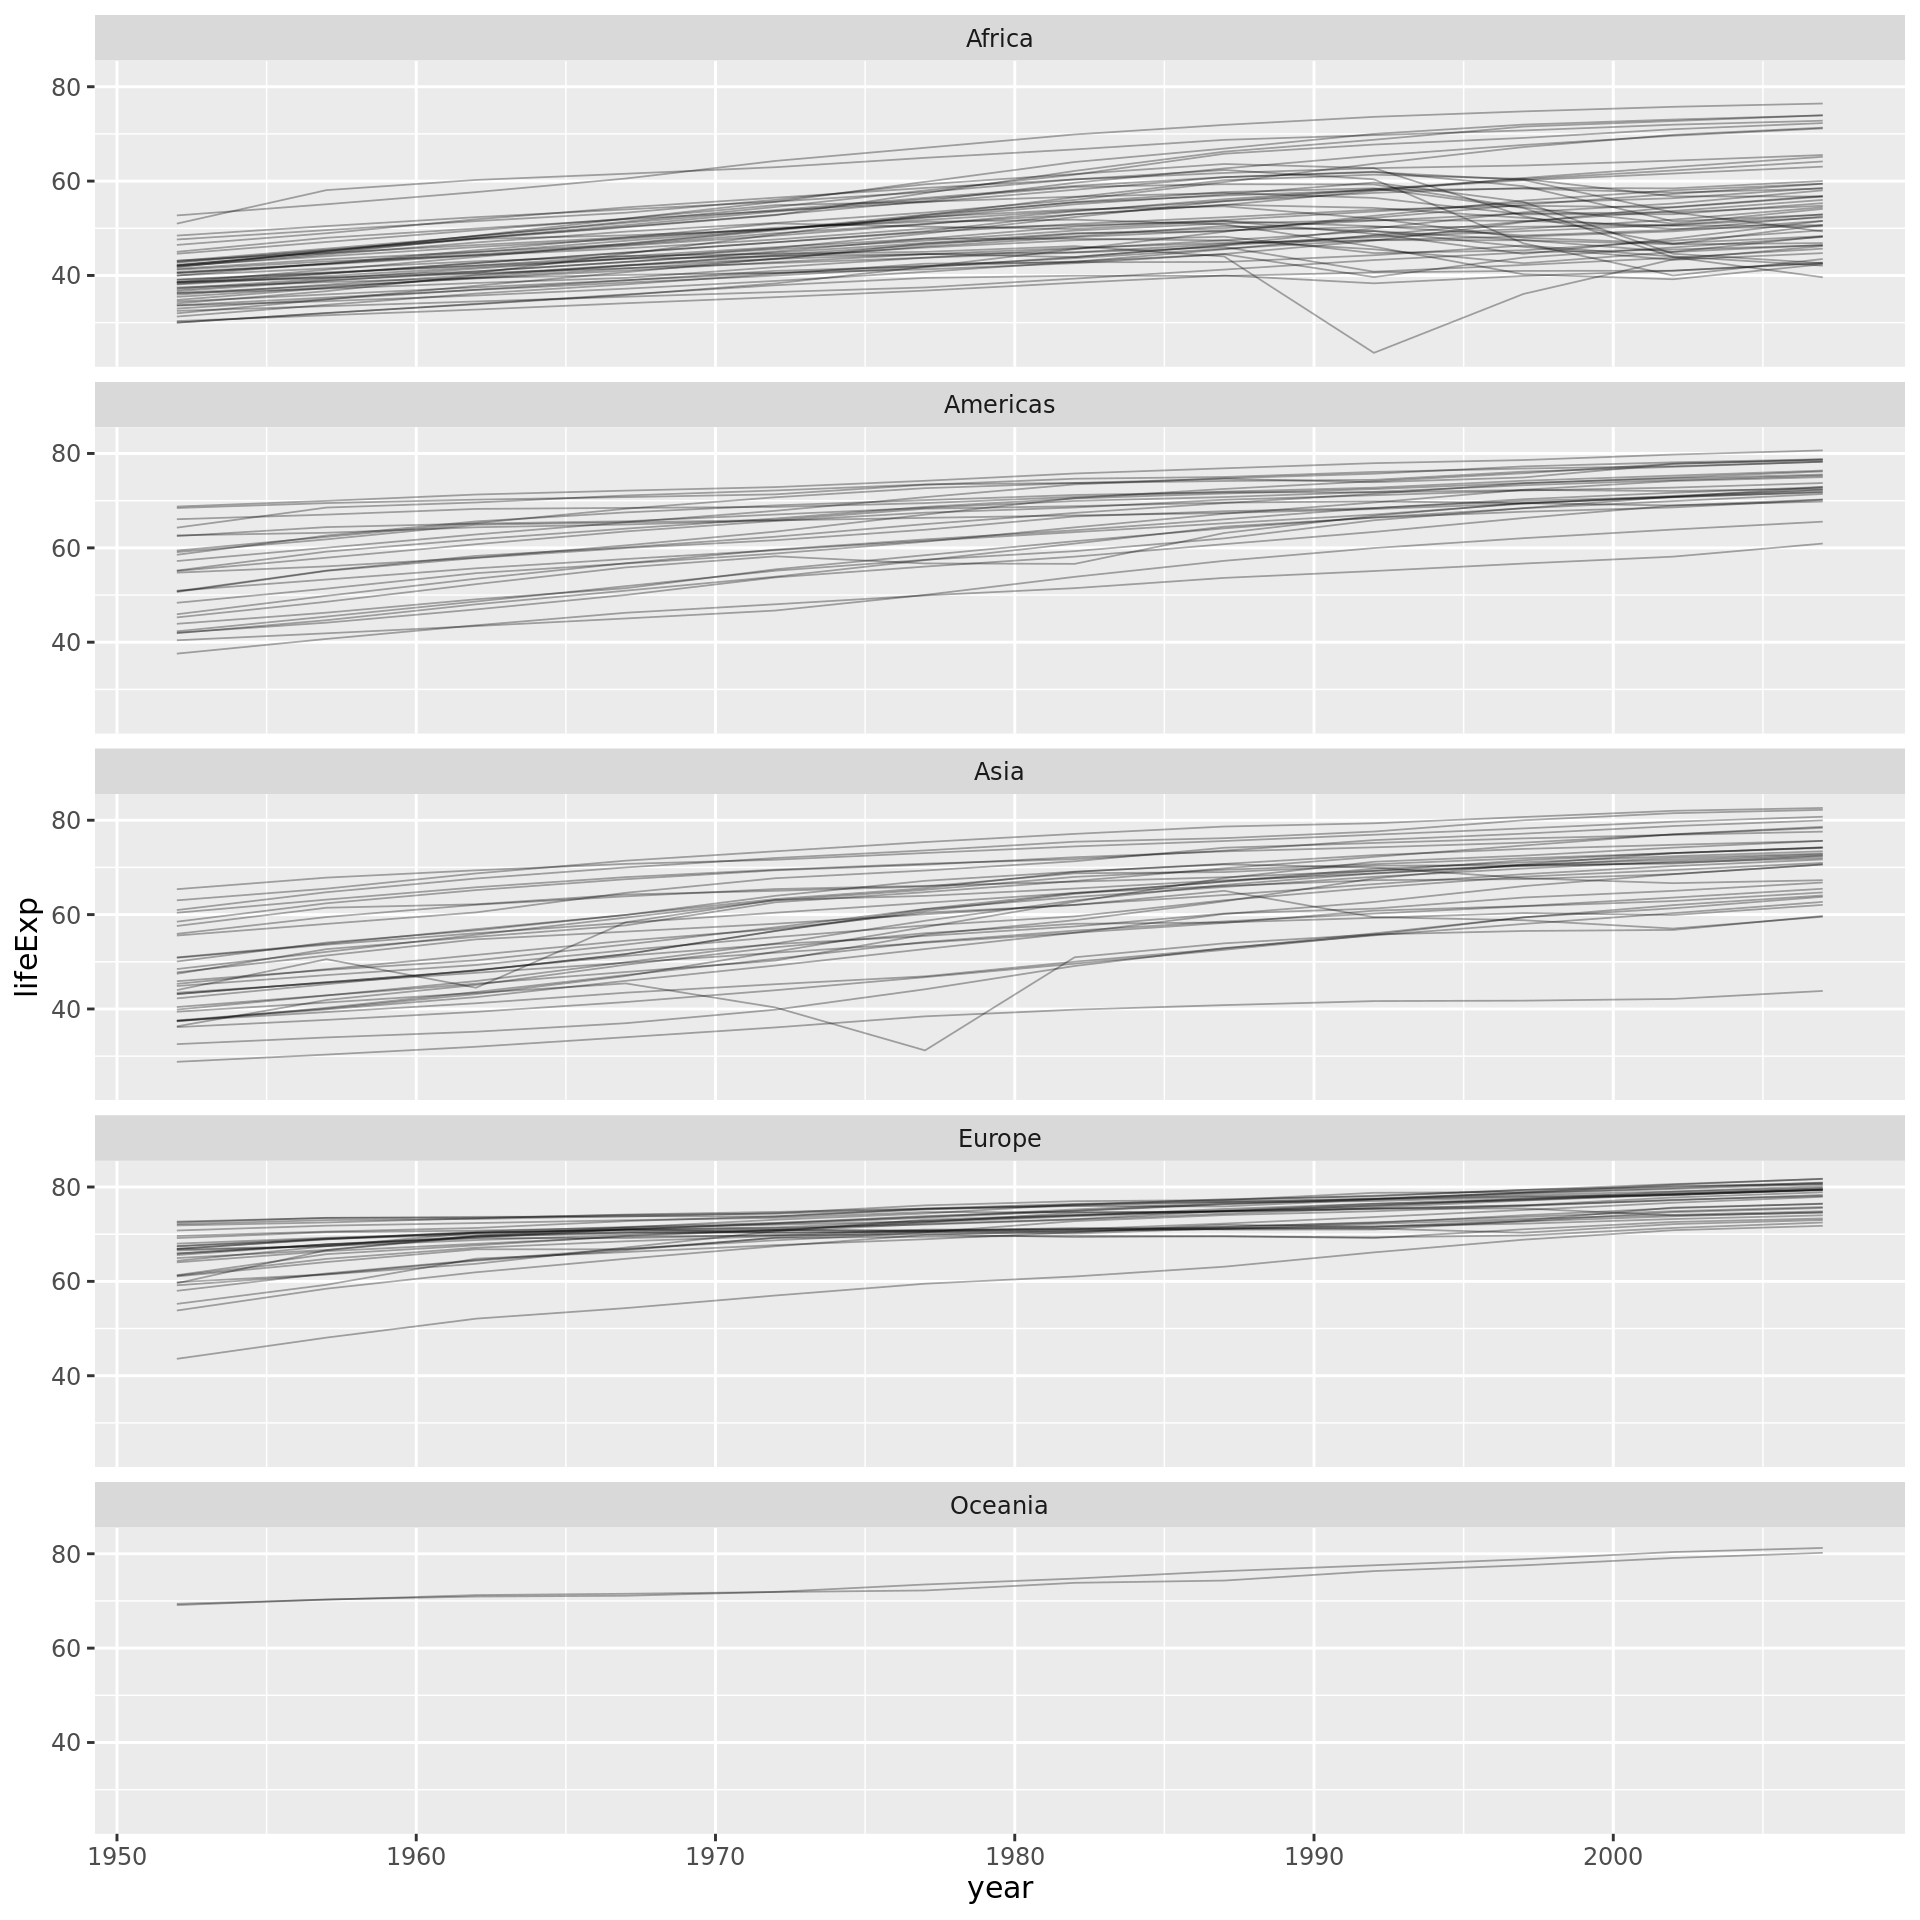

In [6]:
options(repr.plot.height = 16, repr.plot.width = 16)

gapminder %>% 
    ggplot(aes(year, lifeExp, group = country)) +
    geom_line(alpha = 1/3) +
    facet_wrap(~ continent, ncol = 1)

Save the line plots to an external file.

In [7]:
ggsave('mylineplot-highres-6x4.png', dpi = 300, width = 16, height = 16)

## Base R example

Unlike the nice useability of ggplot and ggsave, I'm not sure how best to view a base R plot in the notebook and then save it to a file. If you know a better way, please feel free to update this section about sending base R plots to files!

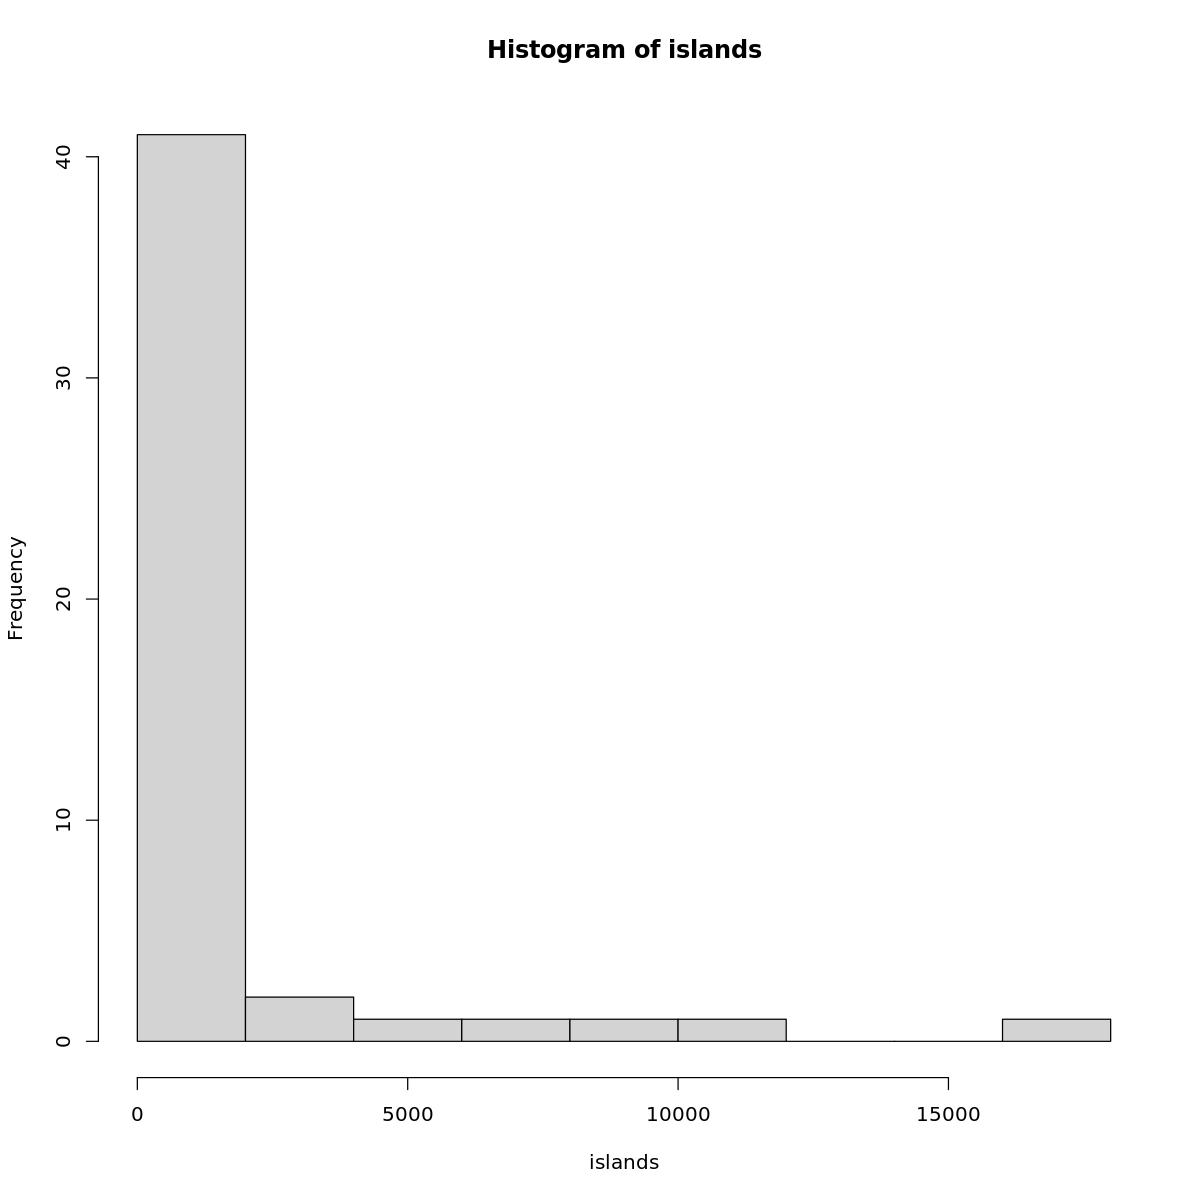

In [8]:
options(repr.plot.height = 10, repr.plot.width = 10)

# Just view the plot.
hist(islands)

Plot directly to a file, then view the contents of that file.

png 
  2

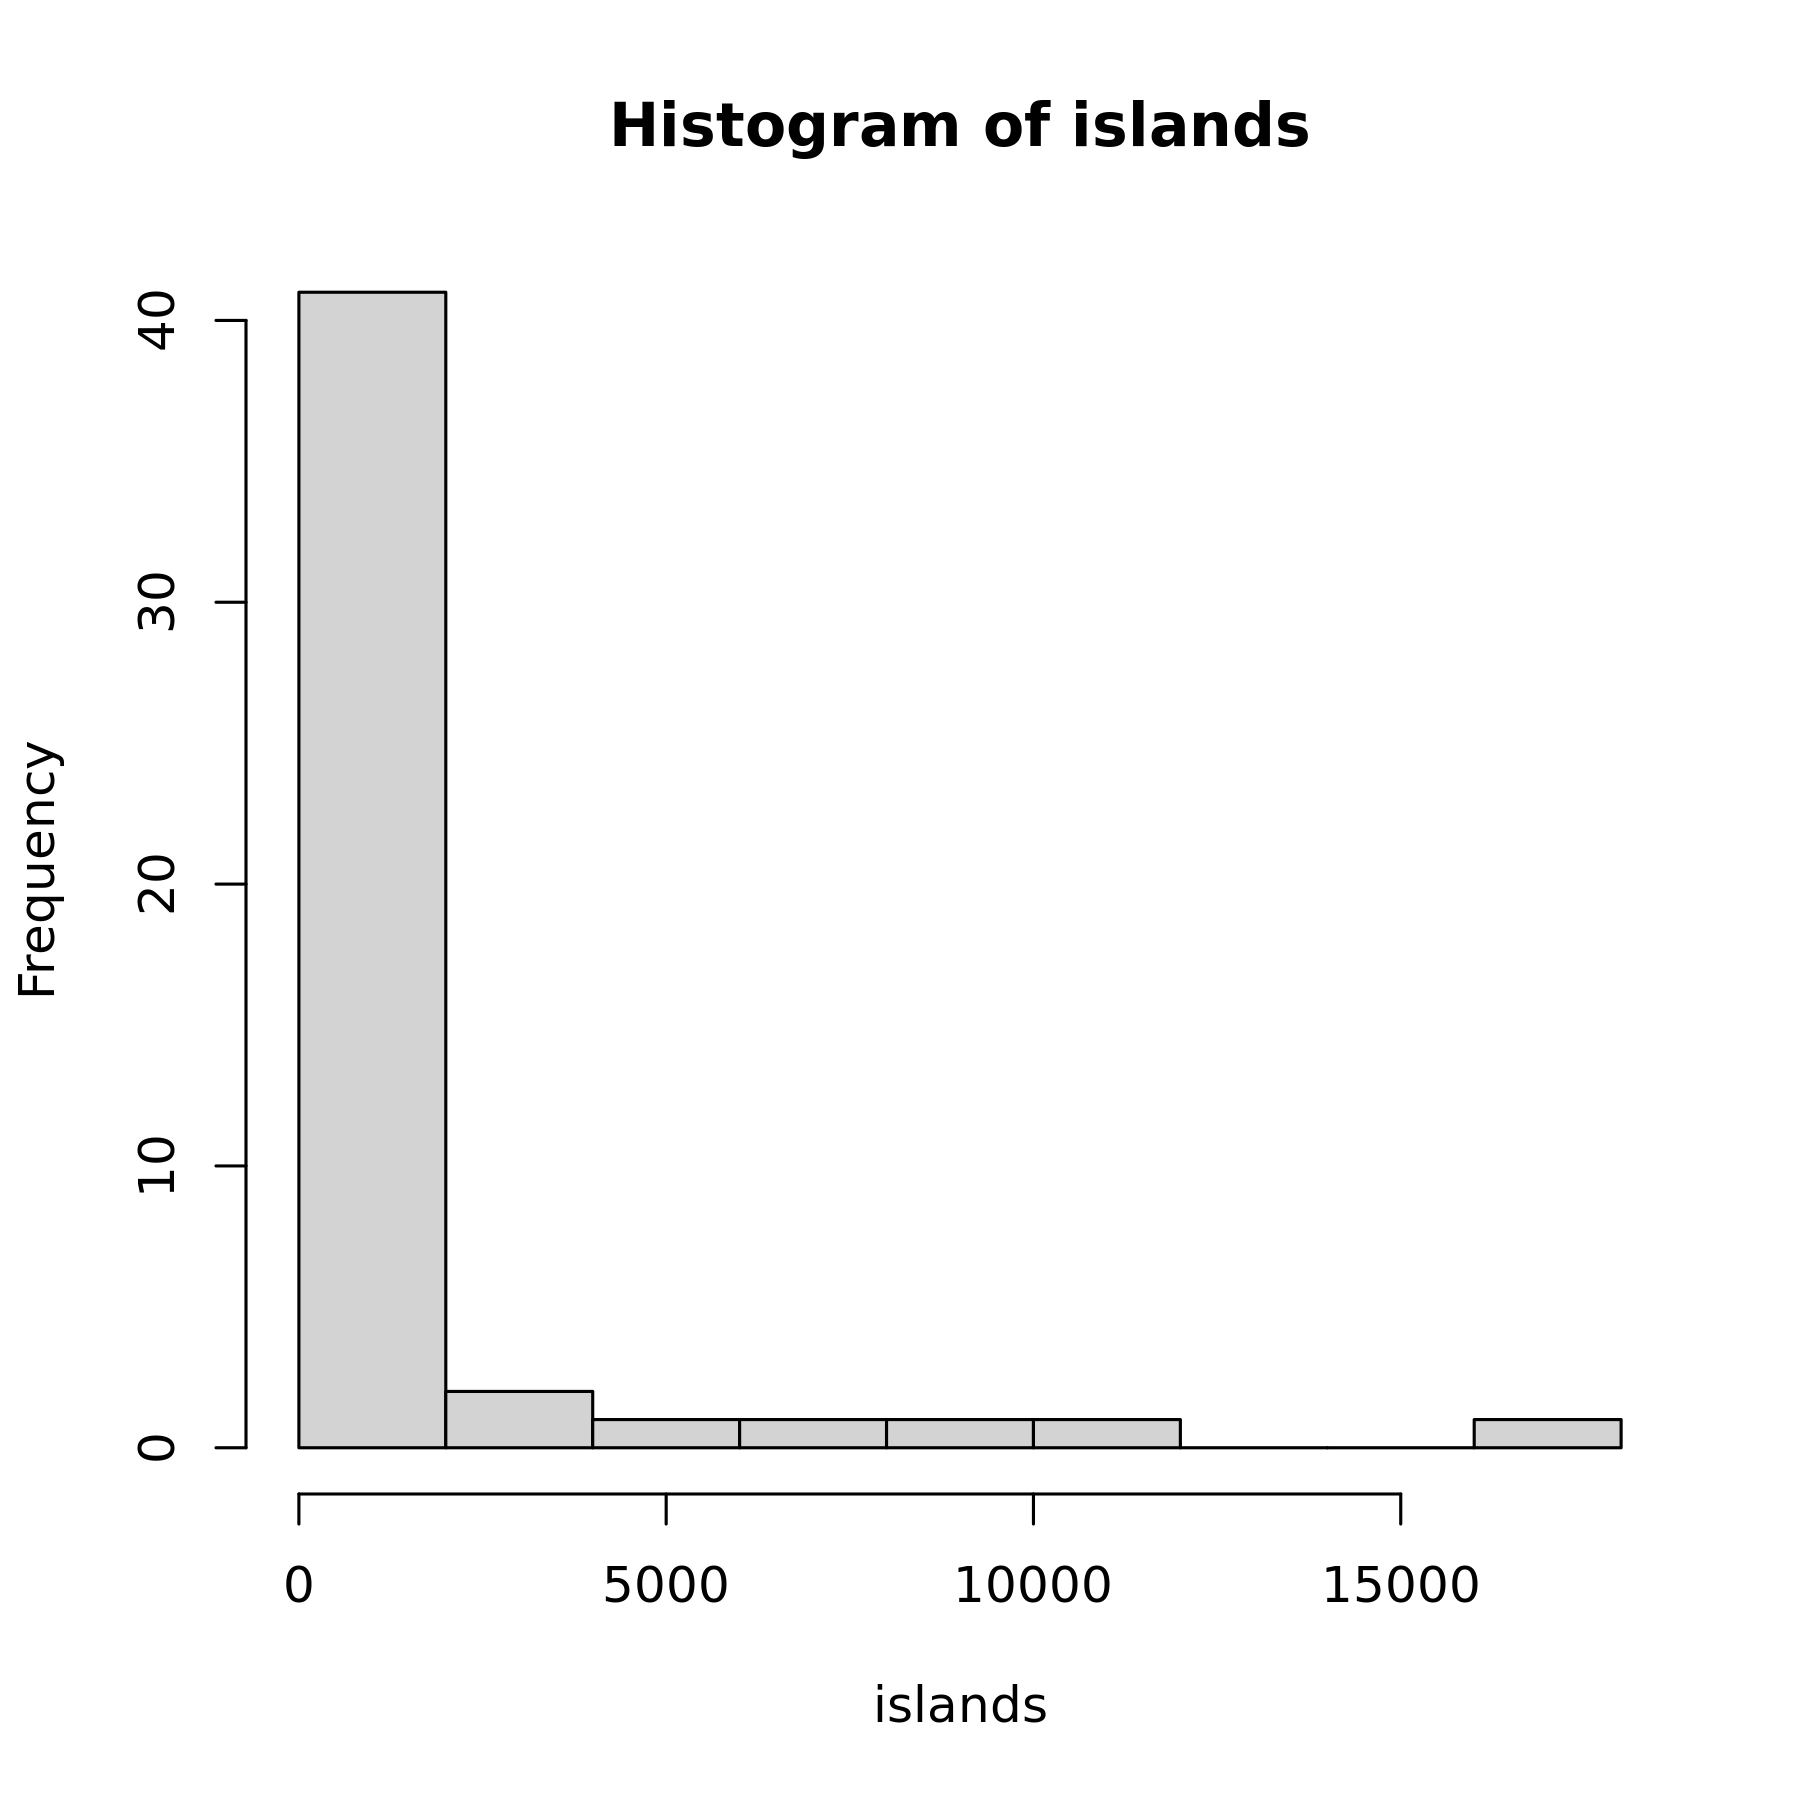

In [9]:
png('print_histogram_direct_file.png', width = 6, height = 6, units = 'in', res = 300)
hist(islands)
dev.off()
IRdisplay::display_png(file = 'print_histogram_direct_file.png')

# Model example

From http://r4ds.had.co.nz/many-models.html

In [10]:
gm_mod <- lm(lifeExp ~ year + continent, data = gapminder)
gm_mod


Call:
lm(formula = lifeExp ~ year + continent, data = gapminder)

Coefficients:
      (Intercept)               year  continentAmericas      continentAsia  
        -596.2613             0.3259            15.7934            11.1996  
  continentEurope   continentOceania  
          23.0384            25.4609  


In [11]:
broom::glance(gm_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6801459,0.679204,7.316102,722.134,0,5,-5805.958,11625.92,11664,90886.03,1698,1704


In [12]:
broom::tidy(gm_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-596.2612967,20.32816245,-29.33179,2.407762e-153
year,0.3259038,0.01026828,31.73890,5.744916e-174
continentAmericas,15.7934065,0.51399962,30.72649,3.087835e-165
continentAsia,11.1995731,0.47004553,23.82657,1.722070e-108
continentEurope,23.0383560,0.48420998,47.57927,1.037069e-314
continentOceania,25.4608782,1.52184114,16.73031,2.811649e-58


Write the model results to a CSV file.

In [13]:
write_csv(broom::tidy(gm_mod), 'gapminder-model.csv')

# [Optional] Download the files to your local machine

If you just need to download a few files, its easy to open the Jupyter console and download them. 

<div class="alert alert-block alert-info">
<b>Tip:</b> You can open the Jupyter console by right clicking on the Jupyter logo <img src="https://jupyter.org/assets/nav_logo.svg" alt="jupyter logo" width="120" height="120" style="vertical-align:top"> at the top left of the Terra UI to open it in a new tab.
</div>

But if you want to download a **batch of files** to your local machine, you can transfer the batch to the workspace bucket, and then download the batch to your local machine.

In [14]:
list.files(pattern = '*png')

[1] "myboxplot-highres-6x4.png"       "mylineplot-highres-6x4.png"     
[3] "print_histogram_direct_file.png"

In [15]:
(DESTINATION <- paste(Sys.getenv('WORKSPACE_BUCKET'),
                      'images',
                      Sys.getenv('OWNER_EMAIL'),
                      strftime(now(), '%Y%m%d/%H%M%S'),
                      sep = '/'))

[1] "gs://fc-ce0a87d7-b388-489d-9169-79ad4aa2e58d/images/deflaux@google.com/20210520/172928"

In [16]:
system(str_glue('gsutil -m cp *png {DESTINATION} 2>&1'), intern = TRUE)

[1] "Copying file://myboxplot-highres-6x4.png [Content-Type=image/png]..."                                                                                                                                                                                                                                                                                                                                                                                                                                        
[2] "Copying file://mylineplot-highres-6x4.png [Content-Type=image/png]..."                                                                                                                                                                                                                                                                                                                                                                                                                                       
[3] "Copying file://print_histogram_direct_file.png [Content-Type=image/png]..."                                                                                                                                                                                                                                                                                                                                                                                                                                  
[4] "/ [0/3 files][    0.0 B/  1.2 MiB]   0% Done                                    \r/ [0/3 files][    0.0 B/  1.2 MiB]   0% Done                                    \r/ [0/3 files][    0.0 B/  1.2 MiB]   0% Done                                    \r/ [1/3 files][  1.2 MiB/  1.2 MiB]  99% Done                                    \r/ [2/3 files][  1.2 MiB/  1.2 MiB]  99% Done                                    \r/ [3/3 files][  1.2 MiB/  1.2 MiB] 100% Done                                    \r"
[5] "Operation completed over 3 objects/1.2 MiB.                                      "

In [17]:
system(str_glue('gsutil ls {DESTINATION} 2>&1'), intern = TRUE)

[1] "gs://fc-ce0a87d7-b388-489d-9169-79ad4aa2e58d/images/deflaux@google.com/20210520/172928/myboxplot-highres-6x4.png"      
[2] "gs://fc-ce0a87d7-b388-489d-9169-79ad4aa2e58d/images/deflaux@google.com/20210520/172928/mylineplot-highres-6x4.png"     
[3] "gs://fc-ce0a87d7-b388-489d-9169-79ad4aa2e58d/images/deflaux@google.com/20210520/172928/print_histogram_direct_file.png"

Now in the terminal **on your local machine**, you can run the following command to download the batch of files from the workspace bucket:

In [18]:
print(str_glue('# Run this gsutil command in your local terminal.\ngsutil -m cp {DESTINATION}/* . '))

# Run this gsutil command in your local terminal.
gsutil -m cp gs://fc-ce0a87d7-b388-489d-9169-79ad4aa2e58d/images/deflaux@google.com/20210520/172928/* . 


# Provenance

In [19]:
devtools::session_info()

─ Session info ───────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.5 (2021-03-31)
 os       Ubuntu 18.04.5 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2021-05-20                  

─ Packages ───────────────────────────────────────────────────────────────────
 package     * version date       lib source        
 assertthat    0.2.1   2019-03-21 [2] CRAN (R 4.0.5)
 backports     1.2.1   2020-12-09 [2] CRAN (R 4.0.5)
 base64enc     0.1-3   2015-07-28 [2] CRAN (R 4.0.5)
 broom         0.7.6   2021-04-05 [2] CRAN (R 4.0.5)
 cachem        1.0.4   2021-02-13 [2] CRAN (R 4.0.5)
 callr         3.7.0   2021-04-20 [2] CRAN (R 4.0.5)
 cellranger    1.1.0   2016-07-27 [2] CRAN (R 4.0.5)
 cli           2.5.0   2021

Copyright 2018 The Broad Institute, Inc., Verily Life Sciences, LLC All rights reserved.

This software may be modified and distributed under the terms of the BSD license. See the LICENSE file for details.